**For tqdm progress bar to work correctly, before launching this notebook run:**
```bash
$ jupyter nbextension enable --py --sys-prefix widgetsnbextension
```
### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import env
from hdm.dbm import DBM
from hdm.rbm import BernoulliRBM
from hdm.utils import (Stopwatch, RNG, 
                       im_plot, im_reshape, tick_params,
                       plot_confusion_matrix)
from hdm.utils.dataset import load_mnist

%matplotlib inline
%load_ext autoreload
%autoreload 2

### load trained RBM #1

INFO:tensorflow:Restoring parameters from ../models/dbm_mnist_rbm1/model


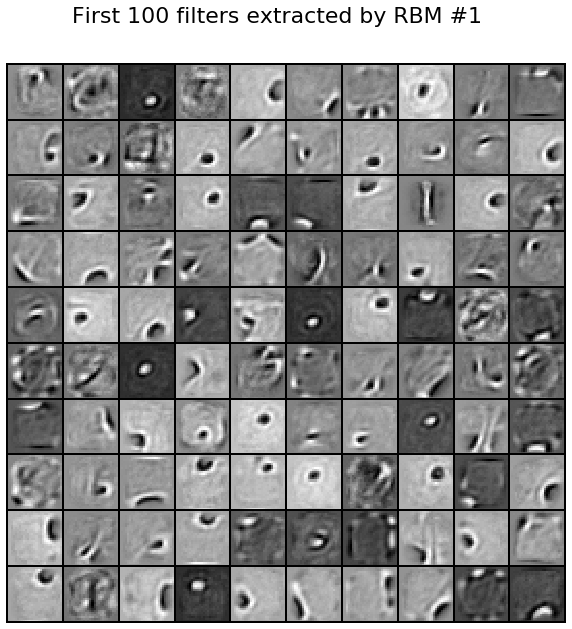

In [2]:
rbm1 = BernoulliRBM.load_model('../models/dbm_mnist_rbm1/')

rbm1_W = rbm1.get_tf_params(scope='weights')['W']
fig = plt.figure(figsize=(10, 10))
im_plot(rbm1_W.T, shape=(28, 28), title='First 100 filters extracted by RBM #1',
        imshow_params={'cmap': plt.cm.gray});
plt.savefig('dbm_mnist_rbm1.png', dpi=196);

### load trained RBM #2 on extracted features $\mathbf{q}_i=\mathbb{P}(\mathbf{h}\;|\;\mathbf{v}=\mathbf{x}_i)$ from RBM #1

INFO:tensorflow:Restoring parameters from ../models/dbm_mnist_rbm2/model


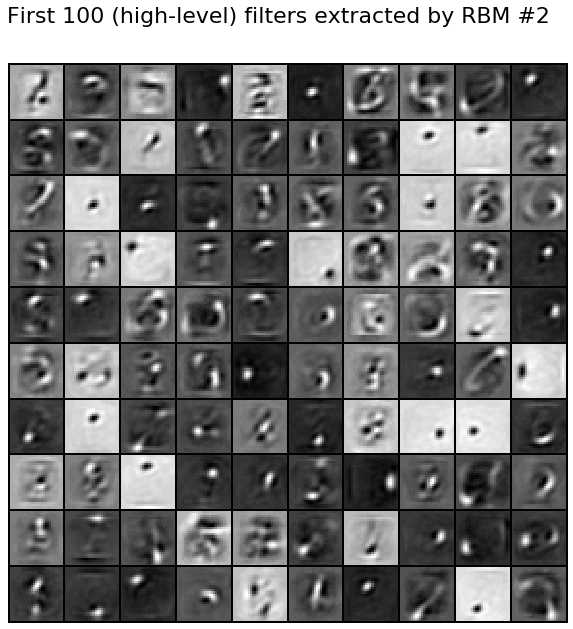

In [3]:
rbm2 = BernoulliRBM.load_model('../models/dbm_mnist_rbm2/')

rbm2_W = rbm2.get_tf_params(scope='weights')['W']
U = rbm1_W.dot(rbm2_W)

fig = plt.figure(figsize=(10, 10))
im_plot(U.T, shape=(28, 28), title='First 100 (high-level) filters extracted by RBM #2',
        imshow_params={'cmap': plt.cm.gray});
plt.savefig('dbm_mnist_rbm2.png', dpi=196);

### load trained DBM and visualize filters in layer 1, 2

### load MNIST

In [4]:
X, y = load_mnist(mode='train', path='../data/')
X /= 255.
X_test, y_test = load_mnist(mode='test', path='../data/')
X_test /= 255.
print X.shape, y.shape, X_test.shape, y_test.shape

(60000, 784) (60000,) (10000, 784) (10000,)


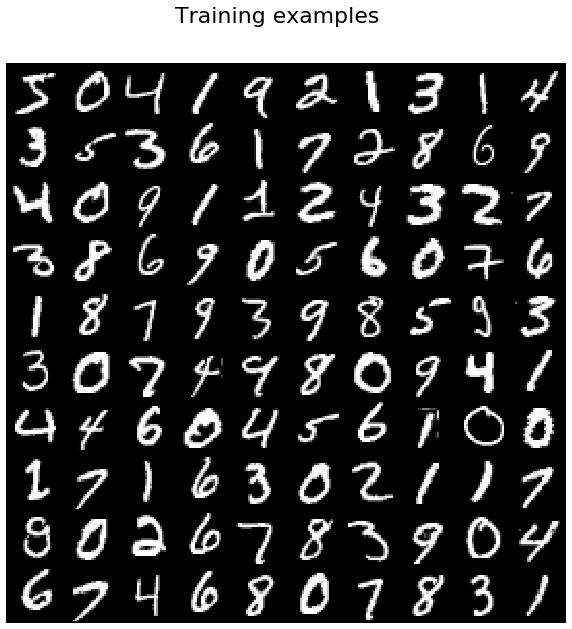

In [5]:
fig = plt.figure(figsize=(10, 10))
im_plot(X[:100], shape=(28, 28), title='Training examples', 
        imshow_params={'cmap': plt.cm.gray})
plt.savefig('mnist.png', dpi=196)

## generate samples after DBM training

## estimate log partition function and average log-probabilities on the test set

## discriminative fine-tuning